## Time Series Exercises Using Datetime Library

In [1]:
import pandas as pd
import numpy as np

from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from vega_datasets import data

### Exercises I

1. Resample by the day and take the average temperature. Visualize the average temperature over time.
2. Write the code necessary to visualize the minimum temperature over time.
3. Write the code necessary to visualize the maximum temperature over time.
4. Which month is the coldest, on average?
5. Which month has the highest average temperature?
6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?
7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [2]:
# bring in the dataframe
df = data.sf_temps()

In [3]:
df.head()

temp                date
0  47.8 2010-01-01 00:00:00
1  47.4 2010-01-01 01:00:00
2  46.9 2010-01-01 02:00:00
3  46.5 2010-01-01 03:00:00
4  46.0 2010-01-01 04:00:00

In [4]:
df.shape

(8759, 2)

### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [5]:
# first things first, set date as index so we can be sure the data is in order
df = df.set_index('date').sort_index()

In [6]:
df.head()

temp
date                     
2010-01-01 00:00:00  47.8
2010-01-01 01:00:00  47.4
2010-01-01 02:00:00  46.9
2010-01-01 03:00:00  46.5
2010-01-01 04:00:00  46.0

In [7]:
# resample by day and get mean average
df.resample('D').mean().head()

temp
date                 
2010-01-01  49.170833
2010-01-02  49.304167
2010-01-03  49.391667
2010-01-04  49.445833
2010-01-05  49.491667

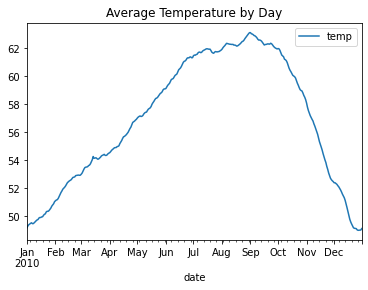

In [8]:
# now plot
# plt.figure(figsize=(16,9))
df.resample('D').mean().plot()
plt.title('Average Temperature by Day');

### 2. Write the code necessary to visualize the minimum temperature over time.

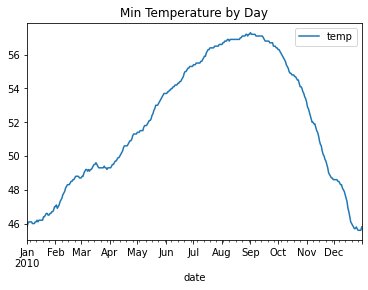

In [9]:
# resampling by day and using minimum temp of the day
df.resample('D').min().plot()
plt.title('Min Temperature by Day');

### 3. Write the code necessary to visualize the maximum temperature over time.

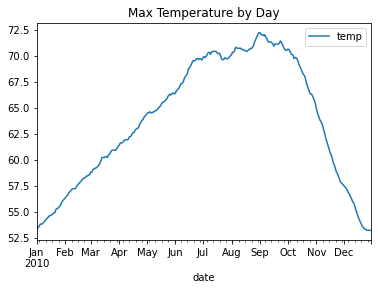

In [10]:
# resampling by day and using maximum temp of the day
df.resample('D').max().plot()
plt.title('Max Temperature by Day');

### 4. Which month is the coldest, on average?

In [11]:
# January is the coldest on average
df.resample('M').mean().sort_values(by='temp').head(1)

temp
date                
2010-01-31  49.98414

### 5. Which month has the highest average temperature?

In [12]:
df.resample('M').mean().sort_values(by='temp').tail(1)

temp
date                 
2010-09-30  62.487083

### 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [13]:
daily_min = df.resample('D').min()
daily_max = df.resample('D').max()

df['daily_temp_change'] = daily_max - daily_min
df.head()

temp  daily_temp_change
date                                        
2010-01-01 00:00:00  47.8                7.5
2010-01-01 01:00:00  47.4                NaN
2010-01-01 02:00:00  46.9                NaN
2010-01-01 03:00:00  46.5                NaN
2010-01-01 04:00:00  46.0                NaN

In [14]:
df.resample('M').daily_temp_change.mean()

date
2010-01-31     8.341935
2010-02-28     9.485714
2010-03-31    10.854839
2010-04-30    12.320000
2010-05-31    12.909677
2010-06-30    13.950000
2010-07-31    13.977419
2010-08-31    13.870968
2010-09-30    14.403333
2010-10-31    13.432258
2010-11-30    10.236667
2010-12-31     7.925806
Freq: M, Name: daily_temp_change, dtype: float64

### 7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

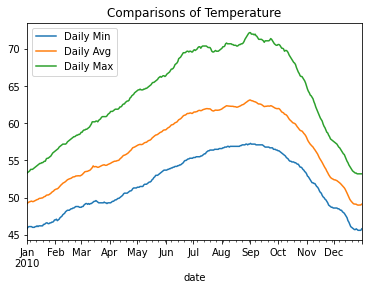

In [15]:
df.resample('D').min().temp.plot(label='Daily Min')
df.resample('D').mean().temp.plot(label='Daily Avg')
df.resample('D').max().temp.plot(label='Daily Max')
plt.title('Comparisons of Temperature')
plt.legend();

### Exercises II

Using: data.seattle_weather()

1. Which year and month combination has the highest amount of precipitation?
2. Visualize the amount of monthly precipitation over time.
3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.
4. Which year-month combination is the windiest?
5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
6. In which month does it rain the most?
7. Which month has the most number of days with a non-zero amount of precipitation?

In [16]:
df = data.seattle_weather()

In [17]:
df.head()

date  precipitation  temp_max  temp_min  wind  weather
0 2012-01-01            0.0      12.8       5.0   4.7  drizzle
1 2012-01-02           10.9      10.6       2.8   4.5     rain
2 2012-01-03            0.8      11.7       7.2   2.3     rain
3 2012-01-04           20.3      12.2       5.6   4.7     rain
4 2012-01-05            1.3       8.9       2.8   6.1     rain

In [18]:
df.shape

(1461, 6)

**1. Which year and month combination has the highest amount of precipitation?**

In [19]:
# first things first, set date as index so we can be sure the data is in order
df = df.set_index('date').sort_index()

In [20]:
# March 2012 has the highest amount of precipitation on average
df.resample('M').sum().precipitation.sort_values().tail(5)

date
2012-03-31    183.0
2012-11-30    210.5
2015-11-30    212.6
2014-03-31    240.0
2015-12-31    284.5
Name: precipitation, dtype: float64

**2. Visualize the amount of monthly precipitation over time.**

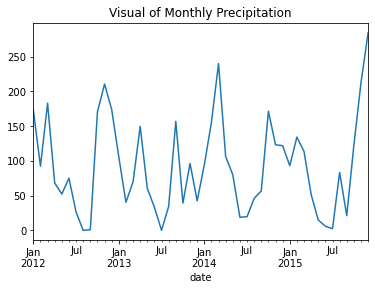

In [21]:
df.precipitation.resample('M').sum().plot()
plt.title('Visual of Monthly Precipitation');

**3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.**

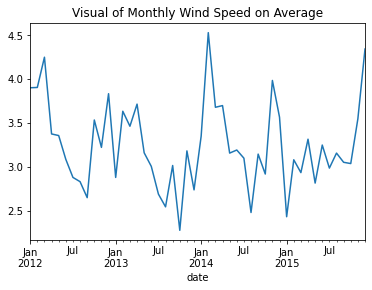

In [22]:
df.wind.resample('M').mean().plot()
plt.title('Visual of Monthly Wind Speed on Average');

**4. Which year-month combination is the windiest?**

In [23]:
# February 2014 appears to be the windiest month
# df.wind.resample('M').mean().sort_values().tail(1) # another way
df.resample('M').wind.mean().nlargest(1)

date
2014-02-28    4.528571
Freq: M, Name: wind, dtype: float64

**5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)**

In [24]:
# 2014 appears to be the sunniest year so far with 211 days of sun
sunny_df = df[df['weather']=='sun']
sunny_df.resample('Y').weather.count().nlargest()

date
2014-12-31    211
2013-12-31    205
2015-12-31    180
2012-12-31    118
Name: weather, dtype: int64

**6. In which month does it rain the most?**

In [25]:
# November 2012 appears to be the rainiest year with 191 days of rain
rainy_df = df[df['weather']=='rain']
rainy_df.resample('M').weather.count().nlargest()

date
2012-11-30    25
2012-12-31    23
2013-02-28    23
2012-03-31    19
2012-04-30    19
Name: weather, dtype: int64

In [26]:
# based off precipitation
df.resample('M').precipitation.sum().sort_values().nlargest()

date
2015-12-31    284.5
2014-03-31    240.0
2015-11-30    212.6
2012-11-30    210.5
2012-03-31    183.0
Name: precipitation, dtype: float64

**7. Which month has the most number of days with a non-zero amount of precipitation?**

In [27]:
df.head()

precipitation  temp_max  temp_min  wind  weather
date                                                        
2012-01-01            0.0      12.8       5.0   4.7  drizzle
2012-01-02           10.9      10.6       2.8   4.5     rain
2012-01-03            0.8      11.7       7.2   2.3     rain
2012-01-04           20.3      12.2       5.6   4.7     rain
2012-01-05            1.3       8.9       2.8   6.1     rain

In [28]:
# December of 2012 has the most number of days with non-zero precipitation with 27 days
precip_df = df[df['precipitation']>0]
precip_df.resample('M').precipitation.count().nlargest(1)

date
2012-12-31    27
Freq: M, Name: precipitation, dtype: int64

### Exercises III

Using: data.flights_20k()

1. Convert any negative delays to 0.
2. Which hour of the day has the highest average delay?
3. Does the day of the week make a difference in the delay amount?
4. Does the month make a difference in the delay amount?

In [29]:
# acquire dataframe
df = data.flights_20k()
df.head()

date  delay  distance origin destination
0 2001-01-13 14:56:00     32       417    SAN         SJC
1 2001-01-31 16:40:00     -5      1093    FLL         ISP
2 2001-02-11 18:39:00      3       293    LBB         DAL
3 2001-01-10 21:00:00    -15       550    MSY         MCO
4 2001-03-30 21:45:00     -2       229    STL         IND

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         20000 non-null  datetime64[ns]
 1   delay        20000 non-null  int64         
 2   distance     20000 non-null  int64         
 3   origin       20000 non-null  object        
 4   destination  20000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 781.4+ KB


In [31]:
# first things first, set date as index so we can be sure the data is in order
df = df.set_index('date').sort_index()

In [32]:
df.shape

(20000, 4)

**1. Convert any negative delays to 0.**

In [51]:
# df.mask(df[df['delay']<0].delay, 0)

In [34]:
# take a lookt at data with delay less than zero
df[df['delay']<0].delay

date
2001-01-01 06:30:00    -8
2001-01-01 07:00:00   -10
2001-01-01 07:05:00   -15
2001-01-01 07:15:00   -25
2001-01-01 07:45:00    -6
                       ..
2001-03-31 20:05:00   -12
2001-03-31 20:30:00   -11
2001-03-31 21:05:00    -5
2001-03-31 21:05:00    -1
2001-03-31 21:30:00   -11
Name: delay, Length: 8482, dtype: int64

In [35]:
# create a function to conver negative delay to zero
def delay_to_zero(x):
    if x < 0:
        x = 0
    return x

In [36]:
# use the function on the dataframe
df.delay = df.delay.apply(delay_to_zero)

In [37]:
# another method is to use np.where
df.delay = np.where(df.delay < 0, 0, df.delay)

In [39]:
df.head()

delay  distance origin destination
date                                                   
2001-01-01 00:01:00     14       405    MCI         MDW
2001-01-01 06:20:00      0       491    BNA         MCI
2001-01-01 06:30:00      0       251    MDW         STL
2001-01-01 07:00:00      0       361    OAK         ONT
2001-01-01 07:00:00      0       303    MSY         HOU

**2. Which hour of the day has the highest average delay?**

In [41]:
# create an hour column
df['hour'] = df.index.hour

df.head()

delay  distance origin destination  hour
date                                                         
2001-01-01 00:01:00     14       405    MCI         MDW     0
2001-01-01 06:20:00      0       491    BNA         MCI     6
2001-01-01 06:30:00      0       251    MDW         STL     6
2001-01-01 07:00:00      0       361    OAK         ONT     7
2001-01-01 07:00:00      0       303    MSY         HOU     7

In [43]:
# groupby hour to get the average delay per hour of the day
df.groupby('hour').delay.mean().sort_values().tail()

hour
22     32.704607
23     65.353846
0     127.916667
1     170.000000
3     302.500000
Name: delay, dtype: float64

**3. Does the day of the week make a difference in the delay amount?**

In [44]:
# make a new column weekday
df['weekday'] = df.index.day_name()

In [46]:
df.head()

delay  distance origin destination  hour weekday
date                                                                 
2001-01-01 00:01:00     14       405    MCI         MDW     0  Monday
2001-01-01 06:20:00      0       491    BNA         MCI     6  Monday
2001-01-01 06:30:00      0       251    MDW         STL     6  Monday
2001-01-01 07:00:00      0       361    OAK         ONT     7  Monday
2001-01-01 07:00:00      0       303    MSY         HOU     7  Monday

In [49]:
# get the average delay by day of the week
df.groupby('weekday').delay.mean()

weekday
Friday       17.757596
Monday        7.165772
Saturday      8.431498
Sunday       10.413542
Thursday     12.821322
Tuesday       9.410866
Wednesday    11.032478
Name: delay, dtype: float64

**4. Does the month make a difference in the delay amount?**

In [50]:
# make month column
df['month'] = df.index.month

# groupby month
df.groupby('month').delay.mean()

month
1    11.301592
2    12.306106
3     9.875287
Name: delay, dtype: float64